<a href="https://colab.research.google.com/github/Josaphat12-tech/Deep-Learning--And-Machine-Learning-For-Real-Beginners/blob/main/Flower_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg')]

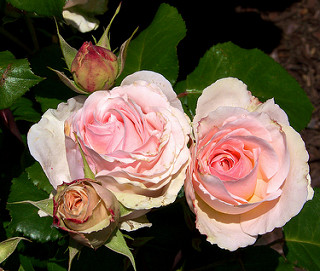

In [7]:
# First Open one image with the Pillow librabry
PIL.Image.open(str(roses[0]))

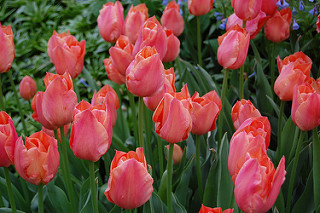

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(271, 320, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)
X[180].shape

(180, 180, 3)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [17]:
X_train.shape

(2752, 180, 180, 3)

In [18]:
len(y_train)

2752

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
X_train_scaled[0]

array([[[0.        , 0.38431373, 0.14117647],
        [0.        , 0.38431373, 0.14117647],
        [0.        , 0.38431373, 0.14509804],
        ...,
        [0.01960784, 0.39607843, 0.15294118],
        [0.01960784, 0.4       , 0.15686275],
        [0.02352941, 0.40392157, 0.15294118]],

       [[0.        , 0.37647059, 0.1372549 ],
        [0.        , 0.37647059, 0.1372549 ],
        [0.00392157, 0.38039216, 0.1372549 ],
        ...,
        [0.01960784, 0.39607843, 0.15686275],
        [0.01568627, 0.4       , 0.15686275],
        [0.01176471, 0.40784314, 0.15294118]],

       [[0.        , 0.36862745, 0.12941176],
        [0.        , 0.36862745, 0.12941176],
        [0.        , 0.36862745, 0.12941176],
        ...,
        [0.01568627, 0.4       , 0.15686275],
        [0.01176471, 0.40392157, 0.16078431],
        [0.01568627, 0.41568627, 0.16078431]],

       ...,

       [[0.09019608, 0.47843137, 0.21176471],
        [0.08235294, 0.47058824, 0.21176471],
        [0.09019608, 0

In [21]:
flowers_class = 5
model = Sequential([
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3,padding = 'same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding = 'same',activation='relu'),
                    layers.MaxPooling2D(),

                    layers.Flatten(),
                    layers.Dense(flowers_class)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])


In [22]:
model.fit(X_train_scaled,y_train,epochs=1)

86/86 [==============================] - 75s 866ms/step - loss: 1.2831 - accuracy: 0.4466


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 264ms/step - loss: 1.2593 - accuracy: 0.4956


[1.25931715965271, 0.49564269185066223]

In [24]:
predictions = model.predict(X_test_scaled)
predictions[:5]

array([[ -2.3516202 ,  -0.61965674,   1.0076085 ,   1.3372921 ,
         -0.22568123],
       [  5.0533447 ,  -4.3803034 , -10.140025  ,  -3.49865   ,
          3.5730796 ],
       [ -1.4127682 ,   0.9756217 ,   2.054478  ,  -1.375991  ,
         -0.5946253 ],
       [  1.2139299 ,  -2.7990193 ,  -5.3035665 ,  -0.46116307,
          1.784727  ],
       [ -1.0919906 ,   1.5636598 ,   1.9397345 ,  -1.8796347 ,
         -0.62425417]], dtype=float32)

In [25]:
score = tf.nn.softmax((predictions[0]))
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.01193306, 0.06744256, 0.34327826, 0.47733805, 0.10000814],
      dtype=float32)>

In [26]:
np.argmax(score)

3

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

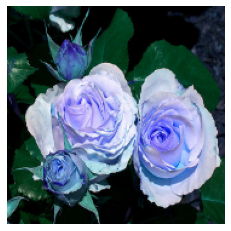

In [28]:
plt.axis('off')
plt.imshow(X[0])

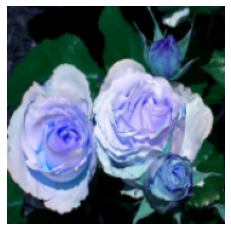

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1)

86/86 [==============================] - 92s 1s/step - loss: 1.3597 - accuracy: 0.4164


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 269ms/step - loss: 1.4696 - accuracy: 0.4542


[1.4696059226989746, 0.4542483687400818]